<a href="https://colab.research.google.com/github/ProfessorDong/Deep-Learning-Course-Examples/blob/master/LeNet_MNIST_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement the LeNet architecture for classification of MNIST data.

In [ ]:
# import libraries

In [ ]:
# Load the MNIST dataset using the mnist.load_data() function.

In [ ]:
# Normalize the pixel values to the range [0, 1] using the astype() method.

In [ ]:
# Reshape the input data to have a single channel using the reshape() method.

In [ ]:
# Convert the labels to one-hot encoding using the to_categorical() function.

In [ ]:
# Define the LeNet model architecture using the Sequential() function and add convolutional, average pooling, and dense layers using the Conv2D(), AveragePooling2D(), Flatten(), and Dense() functions.

In [ ]:
# Compile the model using the compile() method and specify the optimizer, loss function, and metrics to use during training.

In [ ]:
# Train the model using the fit() method and specify the number of epochs to train for and the batch size to use.

In [ ]:
# Evaluate the model on the test set using the evaluate() method and print the test accuracy.

In [ ]:
# Display a few example plots of test results

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the input data to have a single channel
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

# Convert the labels to one-hot encoding
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Define the LeNet model architecture
model = Sequential([
    Conv2D(6, (5, 5), activation="relu", input_shape=(28, 28, 1)),
    AveragePooling2D(),
    Conv2D(16, (5, 5), activation="relu"),
    AveragePooling2D(),
    Flatten(),
    Dense(120, activation="relu"),
    Dense(84, activation="relu"),
    Dense(num_classes, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 25s 49ms/step - loss: 0.3985 - accuracy: 0.8855 - val_loss: 0.1280 - val_accuracy: 0.9615
Epoch 2/10
469/469 [==============================] - 18s 39ms/step - loss: 0.1158 - accuracy: 0.9658 - val_loss: 0.0856 - val_accuracy: 0.9729
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.0879 - accuracy: 0.9732 - val_loss: 0.0593 - val_accuracy: 0.9818
Epoch 4/10
469/469 [==============================] - 18s 38ms/step - loss: 0.0708 - accuracy: 0.9785 - val_loss: 0.0543 - val_accuracy: 0.9834
Epoch 5/10
469/469 [==============================] - 17s 36ms/step - loss: 0.0592 - accuracy: 0.9816 - val_loss: 0.0446 - val_accuracy: 0.9854
Epoch 6/10
469/469 [==============================] - 19s 41ms/step - loss: 0.0516 - accuracy: 0.9838 - val_loss: 0.0467 - val_accuracy: 0.9852
Epoch 7/10
469/469 [==============================] - 18s 38ms/step - l

313/313 [==============================] - 2s 5ms/step


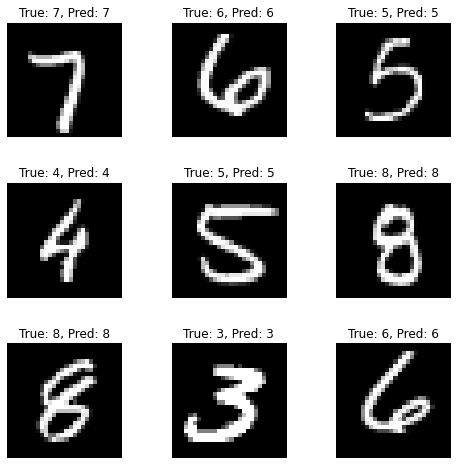

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Get the predicted labels for the test set
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Display a few example plots of test results
fig, axs = plt.subplots(3, 3, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
axs = axs.ravel()
for i in range(9):
    idx = np.random.randint(0, len(x_test))
    axs[i].imshow(x_test[idx, :, :, 0], cmap="gray")
    axs[i].set_title(f"True: {np.argmax(y_test[idx])}, Pred: {y_pred[idx]}")
    axs[i].axis("off")
plt.show()
